<a href="https://colab.research.google.com/github/Archanasingh27/Ml_ArchanaSingh_27/blob/main/27___CS3_VI_SEM_ANN_Neuralnetwork_for_Mnistnumber_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Mustafalw02/Machine-Learning-Lab-Work/blob/master/Neural_network_for_Mnist_number_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-the-MNIST-dataset-in-Keras" data-toc-modified-id="Loading-the-MNIST-dataset-in-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the MNIST dataset in Keras</a></span></li><li><span><a href="#The-network-architecture" data-toc-modified-id="The-network-architecture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The network architecture</a></span></li><li><span><a href="#The-compilation-step" data-toc-modified-id="The-compilation-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The compilation step</a></span></li><li><span><a href="#Preparing-the-image-data" data-toc-modified-id="Preparing-the-image-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the image data</a></span></li><li><span><a href="#Preparing-the-labels" data-toc-modified-id="Preparing-the-labels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preparing the labels</a></span></li><li><span><a href="#Training-and-Testing" data-toc-modified-id="Training-and-Testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training and Testing</a></span></li></ul></div>

# Loading the MNIST dataset in Keras

In [36]:
from keras.datasets import mnist  #keras where all the liberariewe of the ML is Presents

In [37]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [38]:
train_images.shape

(60000, 28, 28)

In [39]:
len(train_labels)

60000

In [40]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
test_images.shape

(10000, 28, 28)

In [43]:
len(test_labels)

10000

In [44]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's build the network

# The network architecture

- The core building block of neural networks is the **layer**, a data-processing module that you can think of as a filter for data.
    - Some data goes in, and it comes out in a more useful form.
    - Layers extract **representations** (hopefully, meaningful for the data problem at hand) out of the data fed into them.
    
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive **data distillation**.
- A deep learning model is like a sieve for data-processing, made of a succession of increasingly refined data filters--**the layers**.

In [45]:
from keras import models  #Dense network using class sequential {Neuron connected with each other}
from keras import layers

In [46]:
Archana = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
Archana.add(layers.Dense(1056, activation='sigmoid', input_shape=(28 * 28, )))
Archana.add(layers.Dense(512, activation='relu'))
Archana.add(layers.Dense(256, activation='tanh'))
Archana.add(layers.Dense(10, activation='softmax'))
Archana.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1056)           │       828,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       541,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,504,042 (5.74 MB)

 Trainable params: 1,504,042 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

- Our network consists of a sequence of two *Dense* layers, which are densely connected (also called *fully connected*) neural layers.
- The second (and last) layer is a **10-way** *softmax* layer, which means it will return an array of **10** probability scores. Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

# The compilation step

- To make the network ready for training, we need to pick three more things, as part of the **compilation** step:
 - **A loss function**-- How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
 - **An optimizer**--The mechanism through which the network will update itself based on the data it sees and its loss function.
 - **Metrics to monitor during training and testing**--Here, we will only care about accuracy (the fraction of the images that were correctly classified).

In [47]:
Archana.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Preparing the image data

Before training, we will preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the $[0-1]$ interval.

In [48]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.

In [49]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

# Preparing the labels

We also need to categorically encode the labels.

In [50]:
from keras.utils import to_categorical

In [51]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [52]:
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Training and Testing

We are now ready to train the network, which in Keras is done via a call to the network's fit method--we fit the model to its training data:

In [54]:
Archana.fit(train_images, train_labels, epochs=100, batch_size=20)

Epoch 1/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8671 - loss: 0.4422
Epoch 2/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8972 - loss: 0.3453
Epoch 3/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9055 - loss: 0.3152
Epoch 4/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9165 - loss: 0.2802
Epoch 5/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9257 - loss: 0.2478
Epoch 6/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9310 - loss: 0.2313
Epoch 7/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9356 - loss: 0.2125
Epoch 8/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9408 - loss: 0.1994
Epoch 9/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9444 - loss: 0.1831
Epoch 10/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9484 - loss: 0.1718
Epoch 11/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9526 - loss: 0.1585
Epoch 12/100


- Two quantities are displayed during training:
    - The loss of the network over the training data
    - The accuracy of the network over the training data
    
- We quickly reach an accuracy of **$0.9886 (98.86\%)$** on the training data.

- Now let's check that the model performs well on the test set, too:

In [55]:
test_loss, test_acc = Archana.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0863


In [56]:
print('Test Accuracy: {:.5f} '.format(test_acc))

Test Accuracy: 0.97960 


In [57]:
test_acc

0.9796000123023987

- The test-set accuracy turns out to be $97.780\%$--that is quite a bit lower than the training set accuracy. This gap between training and test accuracy is an example of **overfitting**:the fact that the ML models tend to perform worse on new data than on their training data.

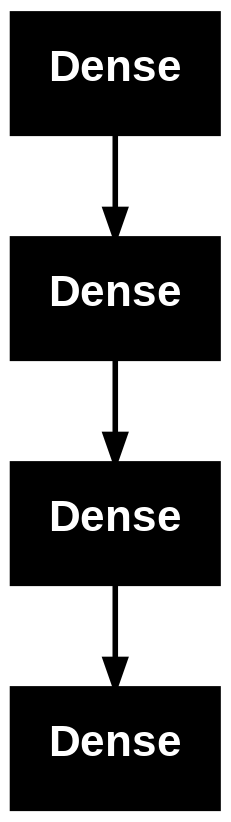

In [58]:
from keras.utils import plot_model
plot_model(Archana, to_file='model.png')

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9994 - loss: 0.0055 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9997 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0055
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 0.0055
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9997 - loss: 0.0047 - val_accuracy: 0.9995 - val_loss: 0.0054
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9996 - loss: 0.0048 - val_accuracy: 0.9995 - val_loss: 0.0054
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


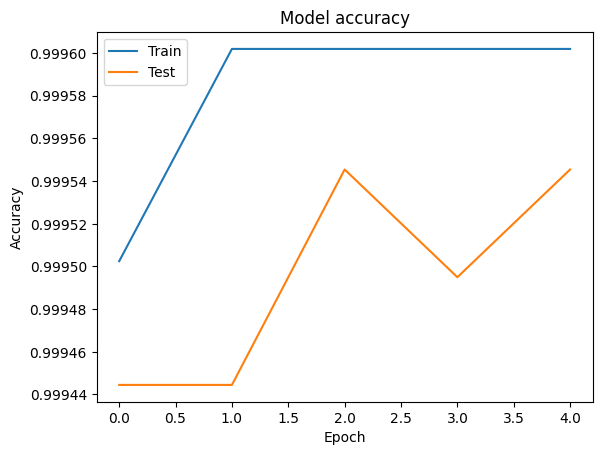

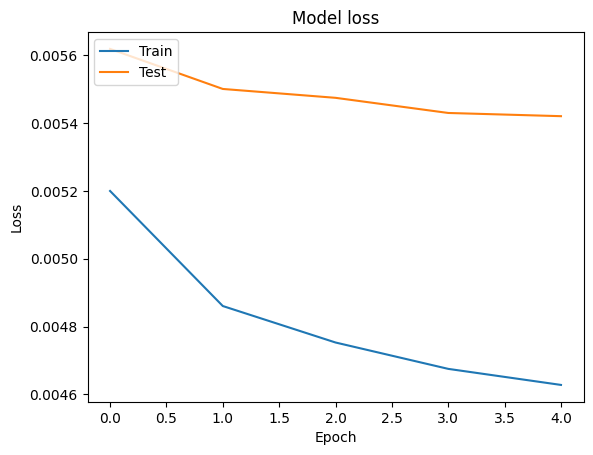

In [59]:
import matplotlib.pyplot as plt
history =Archana.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()